In [2]:
#Importing the neccesary libraries!
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('GIH_Train.csv')
test = pd.read_csv('GIH_Test.csv')
#submission = pd.read_csv('GIH_Sample Submission.csv')

In [4]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [5]:
test.isna().sum()
#Checking for the Null Values

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
dtype: int64

In [6]:
train.nunique()

InvoiceNo      20971
StockCode       3619
Description     3819
Quantity         373
InvoiceDate    19451
UnitPrice        524
CustomerID      4339
Country           37
dtype: int64

In [7]:
train['train_flag'] = 1
test['train_flag'] = 0
#Flagging train and test, so as to seprate them later!

In [29]:
# Identifying the Unique Identifier- Let's see if Invoice No is the Unique Identifier
if train['InvoiceNo'].nunique() == train.shape[0]:
    print("Invoice No is the Unique Identifier")
else:
    print("Invoice No is not the Unique Identifier")

Invoice No is not the Unique Identifier


In [30]:
#Clearly there is no single Unique Identifier in this Data set. 
#Each Invoice can contain Multiple items (Stock code) and it seems that Unit price varies for the same Stock No. too. 

In [8]:
data = pd.concat((train, test))
#Concatinating both data as one dataframe

In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,train_flag
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,1
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,1
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,1
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,1
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,1


In [10]:
#Using string operations, extracting out the Seperate features such as Month, Year, Day, Hour, Minute.
#By experimenting with features, realized that adding the only feature 'Year', improved the model.

data['Date']=data['InvoiceDate'].str.split(' ').str[0]
#data['Time']=data['InvoiceDate'].str.split(' ').str[1]

data['Year']=data['Date'].str.split('-').str[0]
#data['Month']=data['Date'].str.split('-').str[1]
# data['Day']=data['Date'].str.split('-').str[2]

#data['Hour']=data['Time'].str.split(':').str[0]
# data['Minute']=data['Time'].str.split(':').str[1]

data=data.drop(['Date'],axis=1)
#data=data.drop(['Time'],axis=1)
data=data.drop(['InvoiceDate'],axis=1)

In [11]:
data['Year']=data['Year'].astype(str)
#data['Month']=data['Month'].astype(str)
# data['Day']=data['Day'].astype(str)
#data['Hour']=data['Hour'].astype(str)
# data['Minute']=data['Minute'].astype(str)

In [12]:
#data.drop(columns=['InvoiceDate'],inplace=True)

In [13]:
data.corr()
#Checking the corelations,
#Checking for any multi-collinearity in our data, as result didn't find any multi-collinearity within features!

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,train_flag
InvoiceNo,1.000000,0.087392,0.023831,-0.009164,0.007927,-0.005835,0.005271,0.001236
StockCode,0.087392,1.000000,-0.011504,-0.001231,0.020073,0.003602,0.007961,0.000234
Description,0.023831,-0.011504,1.000000,0.000174,-0.000424,-0.004231,-0.013817,-0.001034
Quantity,-0.009164,-0.001231,0.000174,1.000000,-0.000924,-0.003600,-0.009414,-0.000202
UnitPrice,0.007927,0.020073,-0.000424,-0.000924,1.000000,-0.004932,-0.005378,NaN
CustomerID,-0.005835,0.003602,-0.004231,-0.003600,-0.004932,1.000000,0.388294,0.000476
Country,0.005271,0.007961,-0.013817,-0.009414,-0.005378,0.388294,1.000000,-0.000881
train_flag,0.001236,0.000234,-0.001034,-0.000202,NaN,0.000476,-0.000881,1.000000


In [14]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,train_flag,Year
0,6141,1583,144,3,3.75,14056.0,35,1,2011
1,6349,1300,3682,6,1.95,13098.0,35,1,2011
2,16783,2178,1939,4,5.95,15044.0,35,1,2011
3,16971,2115,2983,1,0.83,15525.0,35,1,2011
4,6080,1210,2886,12,1.65,13952.0,35,1,2011


In [15]:
#Taking the absolute value for the feature "Quantity", since I found that values of Quantity were Negative!
#Since quantity taken cannot be negative.

data['Quantity']=abs(data['Quantity'])

In [16]:
#Seperating train and test data, as per flags mentioned!
train, test = data[data.train_flag == 1], data[data.train_flag == 0]

In [17]:
label_col="UnitPrice"
train.drop(['train_flag'], inplace=True, axis=1)
test.drop(['train_flag'], inplace=True, axis=1)
test.drop([label_col], inplace=True, axis=1)

D:\anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year
0,6141,1583,144,3,3.75,14056.0,35,2011
1,6349,1300,3682,6,1.95,13098.0,35,2011
2,16783,2178,1939,4,5.95,15044.0,35,2011
3,16971,2115,2983,1,0.83,15525.0,35,2011
4,6080,1210,2886,12,1.65,13952.0,35,2011


In [19]:
train['UnitPrice'].mean()

3.451215899989596

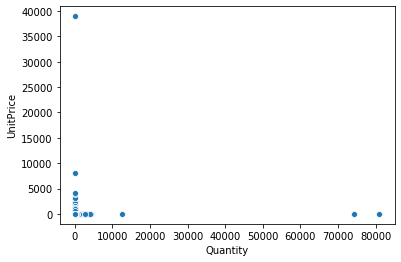

In [20]:
#Plotting a relation between quantity and unit price, in order to trace outliers!
sns.scatterplot(data=train, x="Quantity", y="UnitPrice")

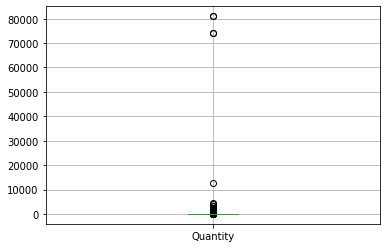

In [21]:
figure=train.boxplot(column="Quantity")

In [22]:
#Replacing the outliers in quantity with the mean value!
train.loc[train['Quantity']>9500,'Quantity']=12.45

D:\anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


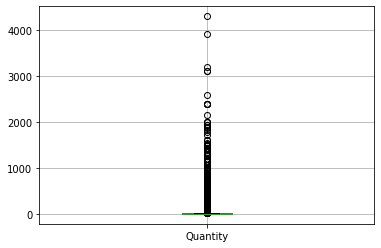

In [23]:
figure=train.boxplot(column="Quantity")

In [24]:
#train.loc[train['UnitPrice']>8500,'UnitPrice']=3.5

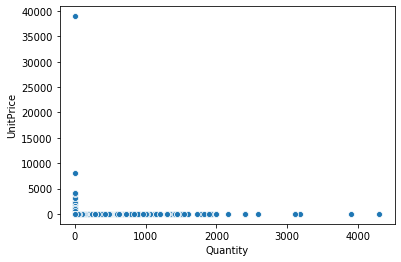

In [25]:
sns.scatterplot(data=train, x="Quantity", y="UnitPrice")

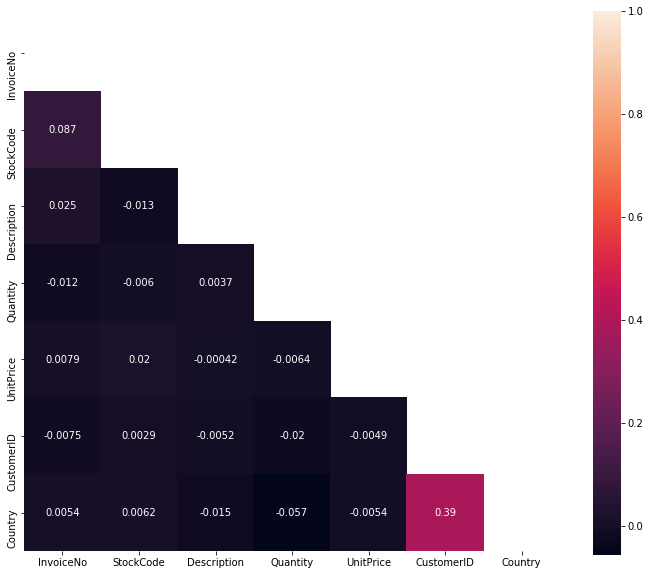

In [27]:
# No use including features that are actually categorical. Included Description to try and figure out the encoding
corr = train.corr()
# Set up a mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, square=True)
plt.show()

In [ ]:
#Significantly there is no real correlation between the dependent and any of Independent variables at all

In [25]:
#As per research made, reading the catboost documentation for Cat-boost algorithm, We know catboost the name suggests,
#Cat-Categorical, while, boost-Gradient boosting techniques, so as per documentation, catboost works really well with the
#Categorical data, since 5 features in our dataset were indeed categorical(As per Machine-Hack description).
#I converted all these features to string variables, so that catboost can work more efficiently.

train['InvoiceNo']=train['InvoiceNo'].astype(str)
train['StockCode']=train['StockCode'].astype(str)
train['Description']=train['Description'].astype(str)
train['CustomerID']=train['CustomerID'].astype(str)
train['Country']=train['Country'].astype(str)
train['Quantity']=train['Quantity'].astype(int)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [26]:
train.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int32
UnitPrice      float64
CustomerID      object
Country         object
Year            object
dtype: object

In [27]:
X_train=train.drop(columns=['UnitPrice'])
Y_train=train['UnitPrice']

In [28]:
Y_train.head()

0    3.75
1    1.95
2    5.95
3    0.83
4    1.65
Name: UnitPrice, dtype: float64

In [ ]:
# import xgboost as xgb
# xgb = xgb.XGBRegressor(max_depth=6, n_estimators=250)

# xgb.fit(x,y)

In [ ]:
#Had experimated a lot with Random-forest. but wasn't able to get the better model.
# from sklearn.ensemble import RandomForestRegressor
# xgb = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
#                       max_depth=None, max_features='auto', max_leaf_nodes=None,
#                       max_samples=None, min_impurity_decrease=0.0,
#                       min_impurity_split=None, min_samples_leaf=1,
#                       min_samples_split=2, min_weight_fraction_leaf=0.0,
#                       n_estimators=103, n_jobs=-2, oob_score=False,
#                       random_state=None, verbose=0, warm_start=False)

# xgb.fit(X_train,Y_train)

In [109]:
#Tuned a bit hyperparemeters for the Catboost algorithm, in order to achieve the better performace, and turn the model to be more generalized!
from catboost import CatBoostRegressor

cfi = ['InvoiceNo','CustomerID', 'StockCode', 'Description', 'Country','Quantity','Year']

model = CatBoostRegressor(
    iterations=870, depth=5, learning_rate=0.05399,
    loss_function = 'RMSE',
    cat_features = cfi )

In [110]:
model.fit(X_train, Y_train)

0:	learn: 28.3863200	total: 342ms	remaining: 4m 56s
1:	learn: 28.1424154	total: 406ms	remaining: 2m 56s
2:	learn: 28.0816632	total: 703ms	remaining: 3m 23s
3:	learn: 27.8610557	total: 1.01s	remaining: 3m 37s
4:	learn: 27.6527944	total: 1.07s	remaining: 3m 6s
5:	learn: 27.4686783	total: 1.14s	remaining: 2m 44s
6:	learn: 27.4193048	total: 1.21s	remaining: 2m 29s
7:	learn: 27.2940272	total: 1.52s	remaining: 2m 43s
8:	learn: 27.1475601	total: 1.59s	remaining: 2m 31s
9:	learn: 27.0048857	total: 1.65s	remaining: 2m 21s
10:	learn: 26.8813480	total: 1.73s	remaining: 2m 14s
11:	learn: 26.7828642	total: 1.79s	remaining: 2m 8s
12:	learn: 26.6493633	total: 2.06s	remaining: 2m 15s
13:	learn: 26.5296122	total: 2.12s	remaining: 2m 9s
14:	learn: 26.4160131	total: 2.23s	remaining: 2m 7s
15:	learn: 26.3167624	total: 2.44s	remaining: 2m 10s
16:	learn: 26.2270343	total: 2.49s	remaining: 2m 5s
17:	learn: 26.1417648	total: 2.56s	remaining: 2m
18:	learn: 26.0576561	total: 2.69s	remaining: 2m
19:	learn: 25.99

In [111]:
test['InvoiceNo']=test['InvoiceNo'].astype(str)
test['StockCode']=test['StockCode'].astype(str)
test['Description']=test['Description'].astype(str)
test['CustomerID']=test['CustomerID'].astype(str)
test['Country']=test['Country'].astype(str)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [112]:
test.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Year
0,3139,1709,1079,3,16161.0,35,2011
1,617,510,3457,1,17341.0,35,2010
2,14653,604,694,36,15158.0,35,2011
3,8634,1478,3473,2,16033.0,35,2011
4,15546,3216,871,1,15351.0,35,2011


In [113]:
submission = model.predict(test)

In [114]:
submission

array([1.24032746, 0.66557073, 3.46762091, ..., 1.17792564, 4.60194823,
       4.54149205])

In [115]:
final = pd.DataFrame({'UnitPrice':submission})
final

,UnitPrice
0,1.240327
1,0.665571
2,3.467621
3,1.084394
4,3.475349
...,...
122044,1.048762
122045,2.253878
122046,1.177926
122047,4.601948


In [116]:
#final.to_csv('C:/Users/Desktop/GIH_1498.csv',index=False)